In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [ ]:
!python $get_processed_data_script_file

In [64]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'raw')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

train_df = pd.read_csv(write_train_path)
train_df.info()

test_df = pd.read_csv(write_test_path)
test_df.info()

test_df['Survived'] = -888 # Adding Survived with a default value

df = pd.concat((train_df, test_df), axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

C:\Users\ELASVIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


### Advanced Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

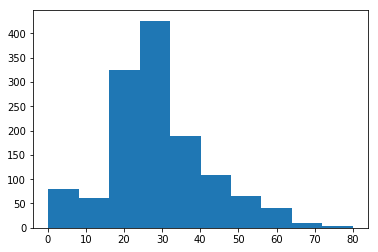

In [15]:
plt.hist(df.Age)

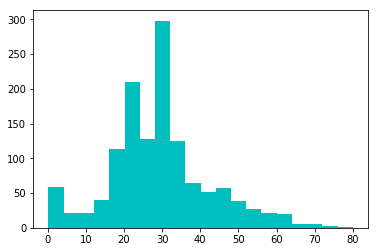

In [16]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

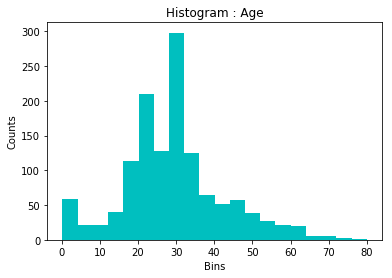

In [17]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

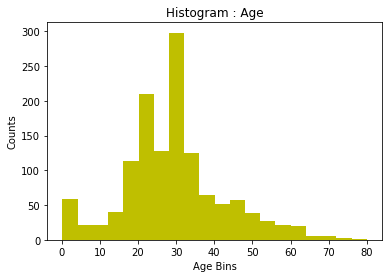

In [26]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='y')
ax.set_title('Histogram : Age')
ax.set_xlabel('Age Bins')
ax.set_ylabel('Counts')
plt.show()

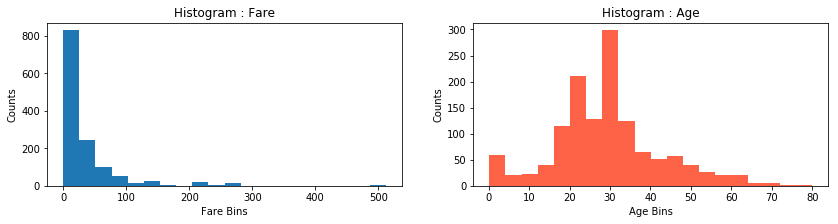

In [29]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20)
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Fare Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Age Bins')
ax2.set_ylabel('Counts')

plt.show()

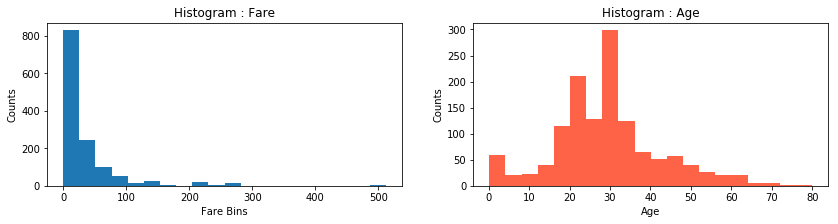

In [36]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20)
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Fare Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Age Bins')
ax2.set_ylabel('Counts')

plt.show()

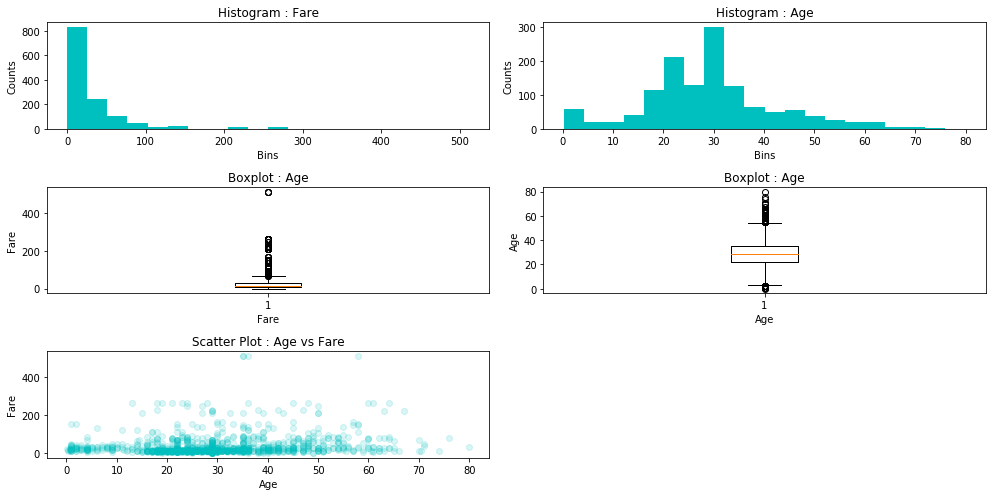

In [41]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()

In [127]:
df.pivot_table(index='Pclass', columns='Embarked', values='Age', aggfunc='mean')

Embarked,C,Q,S
Pclass,,,
1,39.062500,38.000000,39.121987
2,23.645833,49.000000,29.692888
3,21.448667,25.535714,25.247068


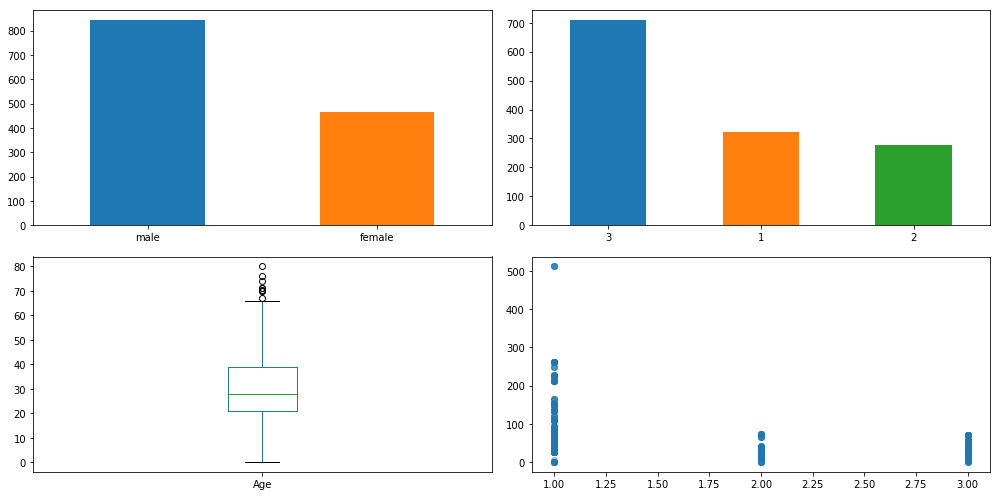

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(14,7))
df.Sex.value_counts().plot(ax=axes[0,0],kind='bar', rot=0)
df.Pclass.value_counts().plot(ax=axes[0,1],kind='bar', rot=0)
df.Age.plot(ax=axes[1,0], kind='box', rot=0)
axes[1,1].scatter(df.Pclass, df.Fare, alpha=0.4)
#pd.crosstab(df.Sex, df.Pclass).plot(ax=axes[1,1], kind='bar', rot=0)
#df.plot.scatter(x='Pclass', y='Fare', title = 'Scatter plot: Passenger class vs Fare', alpha=0.15)
#df.pivot_table(index='Pclass', columns='Embarked', values='Age', aggfunc='mean')

plt.tight_layout()

plt.show()

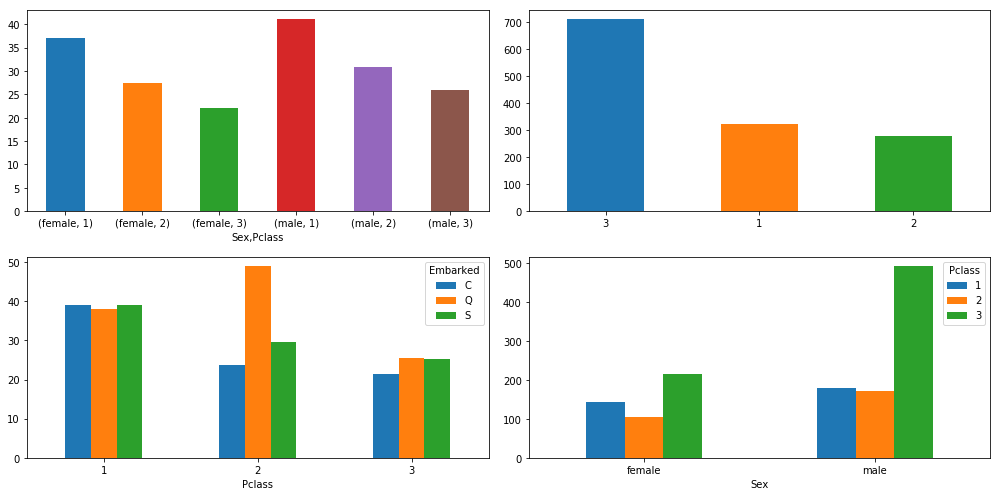

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(14,7))
df.groupby(['Sex', 'Pclass']).Age.mean().plot(ax=axes[0,0], kind='bar', rot=0)
df.Pclass.value_counts().plot(ax=axes[0,1],kind='bar', rot=0)
df.pivot_table(index='Pclass', columns='Embarked', values='Age', aggfunc='mean').plot(ax=axes[1,0], kind='bar', rot=0)
pd.crosstab(df.Sex, df.Pclass).plot(ax=axes[1,1], kind='bar', rot=0)
df.pivot_table(index='Pclass', columns='Embarked', values='Age', aggfunc='mean')
#df.plot.scatter(x='Pclass', y='Fare', title = 'Scatter plot: Passenger class vs Fare', alpha=0.15)

plt.tight_layout()


In [149]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [158]:
df.pivot_table(index='Pclass', columns='Embarked', values='Age', aggfunc='mean')

Embarked,C,Q,S
Pclass,,,
1,39.062500,38.000000,39.121987
2,23.645833,49.000000,29.692888
3,21.448667,25.535714,25.247068


In [157]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


Text(0,0.5,'Counts')

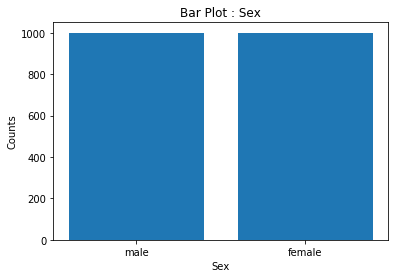

In [110]:
# Adding subplots  - Bar plot not working
f , ax_arr = plt.subplots()

ax_arr.bar(df.Sex, height=1000)
ax_arr.set_title('Bar Plot : Sex')
ax_arr.set_xlabel('Sex')
ax_arr.set_ylabel('Counts')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


male      843
female    466
Name: Sex, dtype: int64

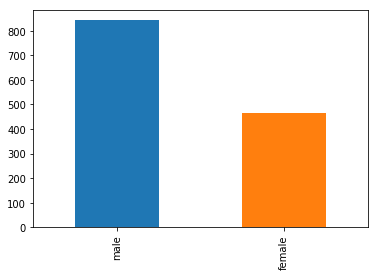

In [77]:
df.Sex.value_counts().plot(kind='bar')
df.Sex.value_counts()